In [1]:
# Importing necessary libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
# Reading the data from the source json file and writing it into a dataframe

df = pd.read_json('C:/Users/adhit/Desktop/Adhi_DS/Capstone ideas/Datasets/News Category Dataset _ Misra/News_Category_Dataset_v3.json',lines=True)


<IPython.core.display.Javascript object>

In [4]:
# Sanity check to confirm the dataframe

df.head(5)

link  \
0  https://www.huffpost.com/entry/covid-boosters-...   
1  https://www.huffpost.com/entry/american-airlin...   
2  https://www.huffpost.com/entry/funniest-tweets...   
3  https://www.huffpost.com/entry/funniest-parent...   
4  https://www.huffpost.com/entry/amy-cooper-lose...   

                                            headline   category  \
0  Over 4 Million Americans Roll Up Sleeves For O...  U.S. NEWS   
1  American Airlines Flyer Charged, Banned For Li...  U.S. NEWS   
2  23 Of The Funniest Tweets About Cats And Dogs ...     COMEDY   
3  The Funniest Tweets From Parents This Week (Se...  PARENTING   
4  Woman Who Called Cops On Black Bird-Watcher Lo...  U.S. NEWS   

                                   short_description               authors  \
0  Health experts said it is too early to predict...  Carla K. Johnson, AP   
1  He was subdued by passengers and crew when he ...        Mary Papenfuss   
2  "Until you have a dog you don't understand wha...         Elyse Wanshel   
3  "Accidentally put grown-up toothpaste on my to...      Caroline Bologna   
4  Amy Cooper accused investment firm Franklin Te...        Nina Golgowski   

        date  
0 2022-09-23  
1 2022-09-23  
2 2022-09-23  
3 2022-09-23  
4 2022-09-22

<IPython.core.display.Javascript object>

In [5]:
# Checking for null values

df.isna().sum()

link                 0
headline             0
category             0
short_description    0
authors              0
date                 0
dtype: int64

<IPython.core.display.Javascript object>

In [6]:
# Checking for duplicates and if any, finding their count

df.duplicated().sum()

13

<IPython.core.display.Javascript object>

There are 13 duplicated records in our dataset. Let's check the percent duplicates so that we can understand our data quality. 

In [7]:
# What's the percent of duplicated data we have?

df.duplicated().sum() / df.shape[0] * 100

0.006204450977678294

<IPython.core.display.Javascript object>

Only 0.006% of the dataset is duplicated. 

In [8]:
df[df.duplicated()]

link  \
67677   https://www.huffingtonpost.comhttp://www.mothe...   
67923   https://www.huffingtonpost.comhttp://gizmodo.c...   
70239   https://www.huffingtonpost.comhttp://www.cnbc....   
139830  https://www.huffingtonpost.comhttp://www.cnn.c...   
144409  https://www.huffingtonpost.comhttp://www.upwor...   
145142  https://www.huffingtonpost.comhttp://www.weath...   
178155  https://www.huffingtonpost.comhttp://www.busin...   
187329  https://www.huffingtonpost.comhttp://www.nytim...   
194596  https://www.huffingtonpost.comhttp://blogs.wsj...   
194598  https://www.huffingtonpost.comhttp://www.theda...   
207122  https://www.huffingtonpost.comhttp://d.repubbl...   
207208  https://www.huffingtonpost.comhttp://d.repubbl...   
207318  https://www.huffingtonpost.comhttp://d.repubbl...   

                                                 headline        category  \
67677   On Facebook, Trump's Longtime Butler Calls For...        POLITICS   
67923   Former Facebook Workers: We Routinely Suppress...            TECH   
70239         On Equal Pay Day, The Gap Is Still Too Wide           WOMEN   
139830                The World's Most Dangerous Workout?        WELLNESS   
144409  Some People Call It 'The Best Anti-Smoking Ad ...        WELLNESS   
145142  10 Cities That Could Run Out Of Water - Weathe...     ENVIRONMENT   
178155  Google Is Attacking Apple From The Inside Out ...            TECH   
187329                      Eating For Health, Not Weight        WELLNESS   
194596  Apple Removes Green EPEAT Electronics Certific...            TECH   
194598  Microsoft's $6.2 Billion Writedown Shows It's ...            TECH   
207122  Versace Atelier Worker Reflects On The Glory &...  STYLE & BEAUTY   
207208  Behind-The-Scenes Look At Prada's Workshop (VI...  STYLE & BEAUTY   
207318  Gucci's Frida Giannini Reveals Fashion Week Di...  STYLE & BEAUTY   

                                        short_description authors       date  
67677   Anthony Senecal, who worked as Donald Trump's ...         2016-05-12  
67923   Facebook workers routinely suppressed news sto...         2016-05-09  
70239   Equal Pay Day falls on April 12 in 2016. It's ...         2016-04-12  
139830  Is the "sport of fitness" the world's most dan...         2014-02-10  
144409  Almost all smokers know cigarettes are bad for...         2013-12-22  
145142  Securing access to plentiful, renewable source...         2013-12-15  
178155  After years of hammering away at Apple's share...         2013-01-01  
187329  Almost half of Americans are on a diet -- not ...         2012-09-23  
194596  Apple has pulled its products off the U.S. gov...         2012-07-07  
194598  Fighting for online advertising dominance with...         2012-07-07  
207122  Twenty-four hours before the fashion show, Don...         2012-02-23  
207208  Exclusive worldwide and for the first time in ...         2012-02-22  
207318  Frida Giannini reveals in this worldwide exclu...         2012-02-21

<IPython.core.display.Javascript object>

these are the 13 duplicated rows. Let;s move on to find if there are any duplicated columns.

In [9]:
# Checking for duplicates across columns.

df.T.duplicated()

link                 False
headline             False
category             False
short_description    False
authors              False
date                 False
dtype: bool

<IPython.core.display.Javascript object>

We can conclude that there are no duplicated between columns. So we are good to go.

### Are we seeing equal percent of articles under each category?

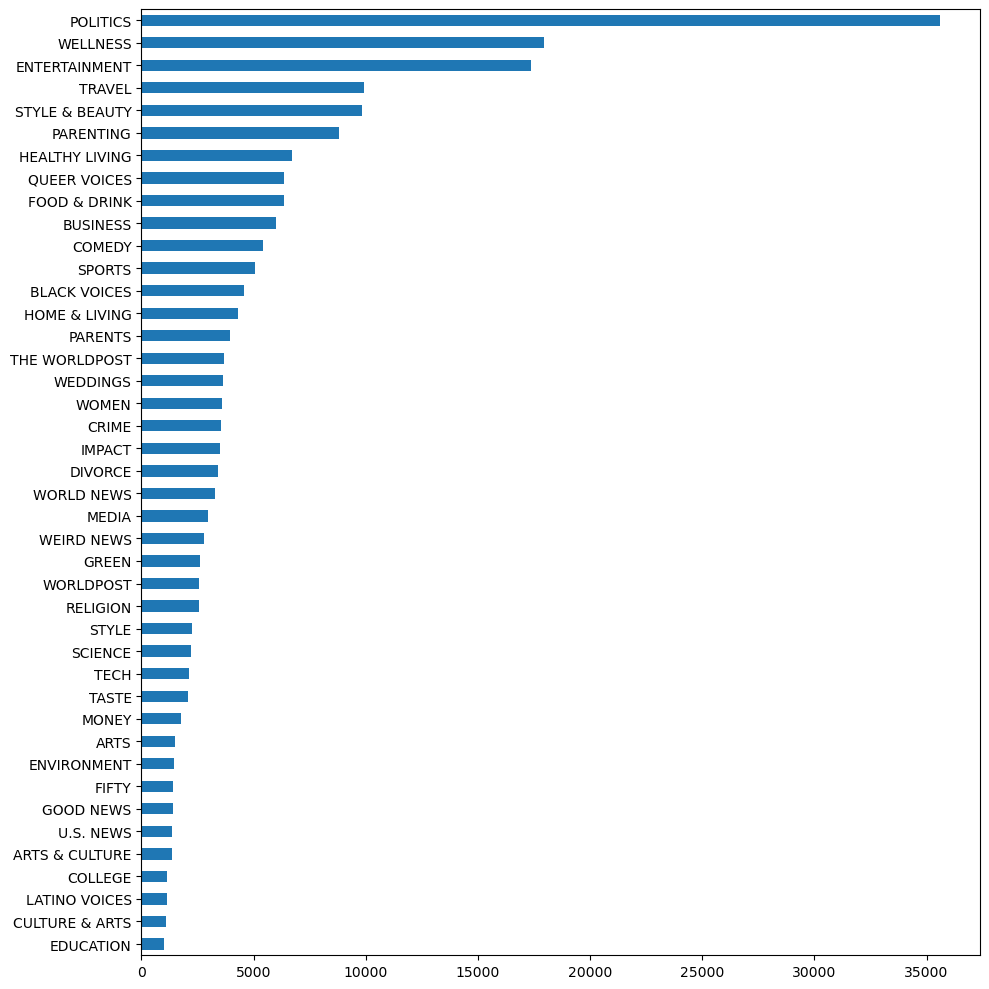

<IPython.core.display.Javascript object>

In [10]:
# Plot horizontal bar charts to visualize the count of each category:

plt.figure(figsize=(10, 10))
df["category"].value_counts().sort_values().plot(
    kind="barh",
)
plt.tight_layout()
plt.show()

As we can see, there are categories that mean similar themes and can be grouped. Example: `SCIENCE` and `TECH` can be grouped to form `SCIENCE AND TECH`

In [11]:
df.groupby("category").ngroups

42

<IPython.core.display.Javascript object>

We can confirm that there are 42 groups in total in the current dataframe. Let's combine the groups that share similar themes in the following section:

In [12]:
df.shape

(209527, 6)

<IPython.core.display.Javascript object>

In [13]:
df["category"] = df["category"].replace(
    {
        "HEALTHY LIVING": "WELLNESS",
        "QUEER VOICES": "GROUPS VOICES",
        "BLACK VOICES": "GROUPS VOICES",
        "LATINO VOICES": "GROUPS VOICES",
        "BUSINESS": "BUSINESS & FINANCES",
        "MONEY": "BUSINESS & FINANCES",
        "PARENTS": "PARENTING",
        "THE WORLDPOST": "WORLD NEWS",
        "WORLDPOST": "WORLD NEWS",
        "STYLE": "STYLE & BEAUTY",
        "GREEN": "ENVIRONMENT",
        "TASTE": "FOOD & DRINK",
        "SCIENCE": "SCIENCE & TECH",
        "TECH": "SCIENCE & TECH",
        "CULTURE & ARTS": "ARTS & CULTURE",
        "ARTS": "ARTS & CULTURE",
        "COLLEGE": "EDUCATION",
        "FIFTY": "MISCELLANEOUS",
        "GOOD NEWS": "MISCELLANEOUS",
    }
)

<IPython.core.display.Javascript object>

In [14]:
df.shape

(209527, 6)

<IPython.core.display.Javascript object>

In [15]:
df.groupby("category").ngroups

27

<IPython.core.display.Javascript object>

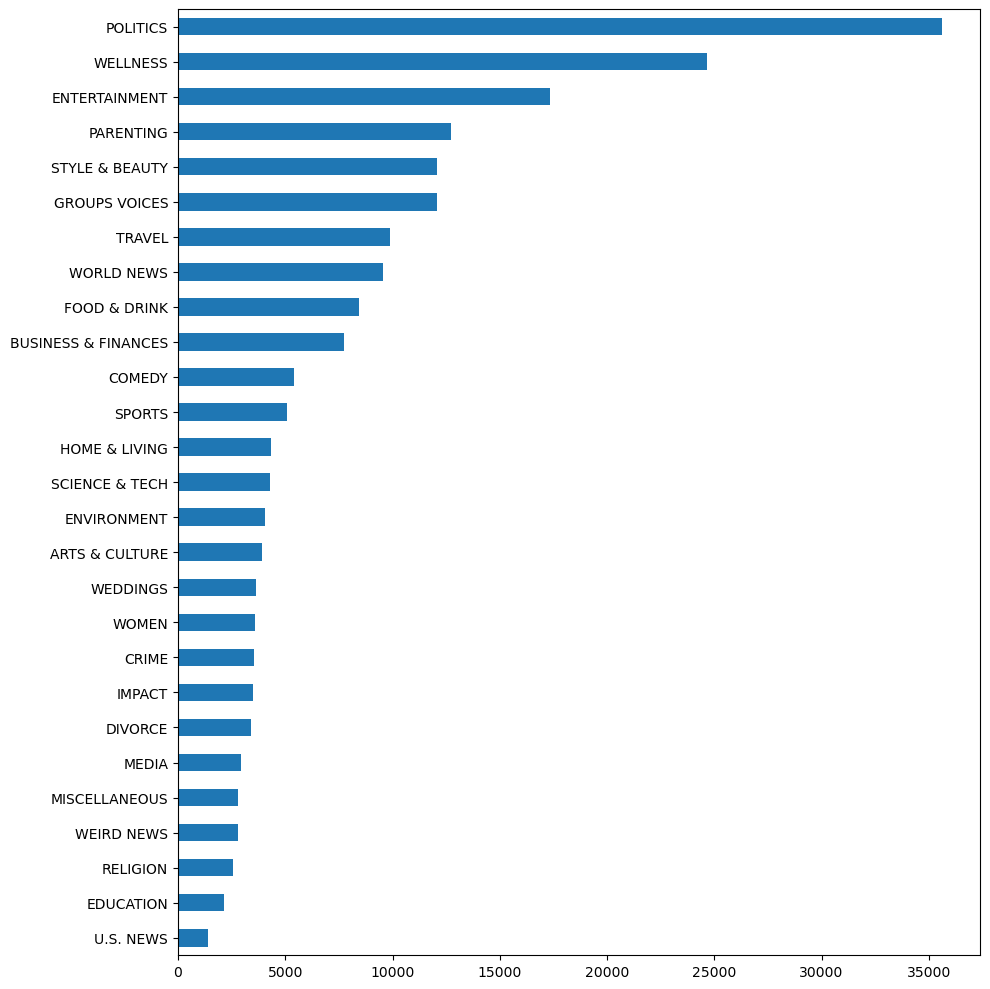

<IPython.core.display.Javascript object>

In [29]:
# Plot horizontal bar charts to visualize the count of each category:

plt.figure(figsize=(10, 10))
df["category"].value_counts().sort_values().plot(
    kind="barh",
)
plt.tight_layout()
plt.show()

Politics has the highest number of articles followed by Wellness and Entertainment. On the contrary, Religion, Education, and U.S. news have the least number of articles among all the categories.

In [28]:
df["category"].value_counts().sort_values(ascending=False).head(5)

POLITICS          35602
WELLNESS          24639
ENTERTAINMENT     17362
PARENTING         12746
STYLE & BEAUTY    12068
Name: category, dtype: int64

<IPython.core.display.Javascript object>

### Are the authors equally popular?

In [30]:
df["authors"].value_counts()

                                                                          37418
Lee Moran                                                                  2954
Ron Dicker                                                                 2219
Ed Mazza                                                                   1590
Mary Papenfuss                                                             1566
                                                                          ...  
Holly Ramer, Associated Press                                                 1
Gina Carey, The Huffington Post                                               1
Randall Chase, Associated Press                                               1
Stephen Ohlemacher, AP                                                        1
John Giacobbi, Contributor\nTales from the Interweb by The Web Sheriff        1
Name: authors, Length: 29169, dtype: int64

<IPython.core.display.Javascript object>

In [18]:
# We are seeing 37418 rows without author information. So why is that?

df[df["authors"] == ""]

link  \
5       https://www.huffpost.com/entry/belk-worker-fou...   
20      https://www.huffpost.com/entry/golden-globes-r...   
21      https://www.huffpost.com/entry/biden-us-forces...   
31      https://www.huffpost.com/entry/2020-census-fal...   
38      https://www.huffpost.com/entry/african-land-sn...   
...                                                   ...   
209520  https://www.huffingtonpost.comhttp://www.engad...   
209523  https://www.huffingtonpost.com/entry/maria-sha...   
209524  https://www.huffingtonpost.com/entry/super-bow...   
209525  https://www.huffingtonpost.com/entry/aldon-smi...   
209526  https://www.huffingtonpost.com/entry/dwight-ho...   

                                                 headline        category  \
5       Cleaner Was Dead In Belk Bathroom For 4 Days B...       U.S. NEWS   
20      Golden Globes Returning To NBC In January Afte...   ENTERTAINMENT   
21      Biden Says U.S. Forces Would Defend Taiwan If ...        POLITICS   
31      Watchdog Report Finds Some Census Takers Who F...       U.S. NEWS   
38      German Customs Officials Follow Trail Of Slime...      WEIRD NEWS   
...                                                   ...             ...   
209520  First White House Chief Technology Officer, An...  SCIENCE & TECH   
209523  Maria Sharapova Stunned By Victoria Azarenka I...          SPORTS   
209524  Giants Over Patriots, Jets Over Colts Among  M...          SPORTS   
209525  Aldon Smith Arrested: 49ers Linebacker Busted ...          SPORTS   
209526  Dwight Howard Rips Teammates After Magic Loss ...          SPORTS   

                                        short_description authors       date  
5       The 63-year-old woman was seen working at the ...         2022-09-22  
20      For the past 18 months, Hollywood has effectiv...         2022-09-20  
21      President issues vow as tensions with China rise.         2022-09-19  
31      Despite entering false information, their work...         2022-09-18  
38      “Never in the history of the Duesseldorf custo...         2022-09-16  
...                                                   ...     ...        ...  
209520  He was appointed with a fair bit of fanfare as...         2012-01-28  
209523  Afterward, Azarenka, more effusive with the pr...         2012-01-28  
209524  Leading up to Super Bowl XLVI, the most talked...         2012-01-28  
209525  CORRECTION: An earlier version of this story i...         2012-01-28  
209526  The five-time all-star center tore into his te...         2012-01-28  

[37418 rows x 6 columns]

<IPython.core.display.Javascript object>

Politics has twice the number of articles compared to the second-highest category, which is Wellness. Following that, Entertainment takes the third position. On the contrary, Education, Culture & Arts, and Latino Voices have the least number of articles among all the categories.

In [19]:
# creating a new dataframe "df_authors" to analyze the authors

# this dataset doesnt contain any blank space for authors.

df_authors = df[df["authors"] != ""]

<IPython.core.display.Javascript object>

In [20]:
# How many rows of data do we have with authors information:

df_authors.shape

(172109, 6)

<IPython.core.display.Javascript object>

In [21]:
df_authors["authors"].value_counts().sort_values(ascending=False).head(10)

Lee Moran           2954
Ron Dicker          2219
Ed Mazza            1590
Mary Papenfuss      1566
Reuters, Reuters    1563
Cole Delbyck        1266
Carly Ledbetter     1170
Curtis M. Wong      1146
Andy McDonald       1100
David Moye          1067
Name: authors, dtype: int64

<IPython.core.display.Javascript object>

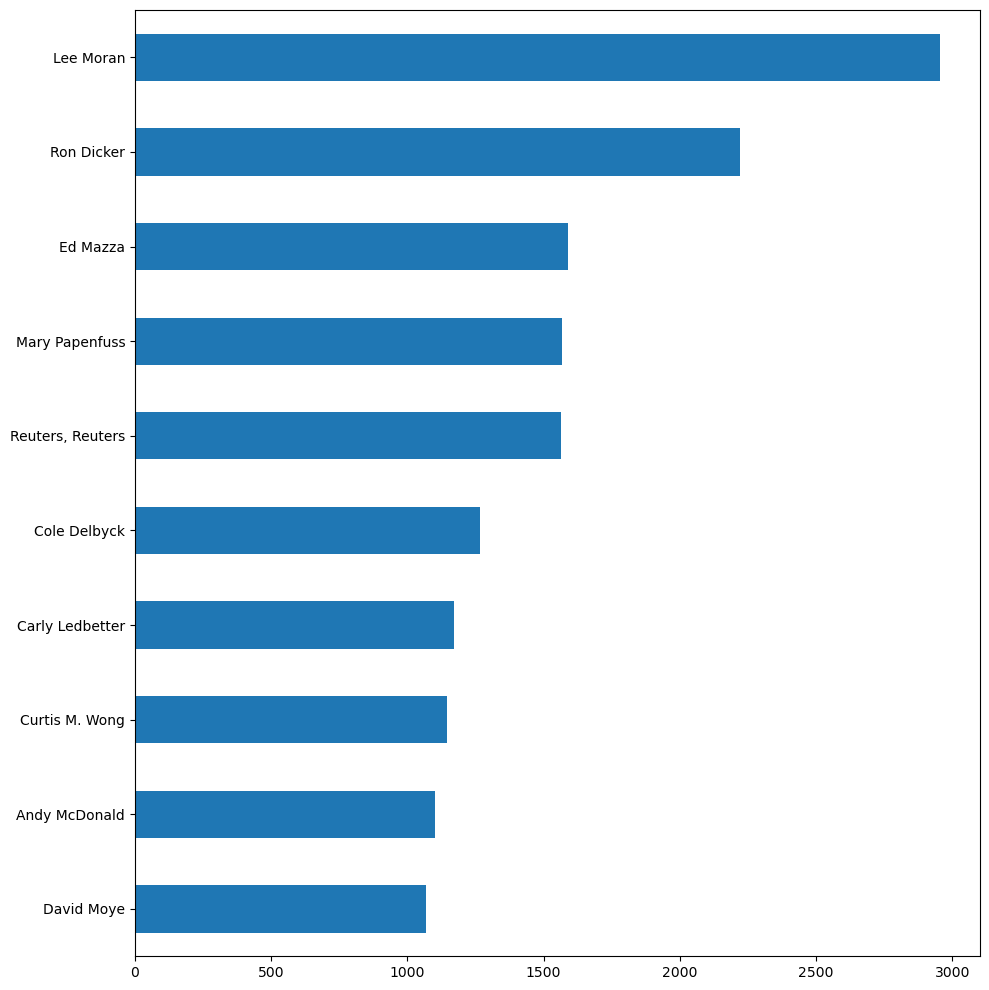

<IPython.core.display.Javascript object>

In [22]:
# Plot horizontal bar charts to visualize the count of each category:

plt.figure(figsize=(10, 10))
df_authors["authors"].value_counts().sort_values(ascending=True).tail(10).plot(
    kind="barh"
)
plt.tight_layout()
plt.show()

Among the authors, Lee Moran, Ron Dicker, and Ed Mazza stand out as the top three article writers, with 2954, 2219, and 1590 articles respectively.

### Deriving month to understand trends by month

In [23]:
# Deriving month from date

df["date"].dt.month

0         9
1         9
2         9
3         9
4         9
         ..
209522    1
209523    1
209524    1
209525    1
209526    1
Name: date, Length: 209527, dtype: int64

<IPython.core.display.Javascript object>

In [24]:
# Creating a new column to have the derived month

df["month_num"] = df["date"].dt.month

<IPython.core.display.Javascript object>

In [25]:
df["month_num"].value_counts()

3     19099
5     18627
4     18293
2     17879
8     17397
7     17297
10    17221
1     17162
6     16977
9     16590
12    16531
11    16454
Name: month_num, dtype: int64

<IPython.core.display.Javascript object>

March is the month with the highest number of articles.

In [81]:
trial = df.groupby(["month_num", "category"]).count().unstack()

<IPython.core.display.Javascript object>

In [82]:
trial["link"]

category   ARTS & CULTURE  BUSINESS & FINANCES  COMEDY  CRIME  DIVORCE  \
month_num                                                                
1                     296                  554     462    309      250   
2                     291                  540     473    244      314   
3                     381                  738     518    287      361   
4                     382                  753     450    295      355   
5                     417                  782     469    266      332   
6                     335                  770     314    253      340   
7                     324                  650     393    313      269   
8                     296                  612     389    338      323   
9                     275                  582     444    295      210   
10                    306                  574     491    276      236   
11                    299                  600     515    317      229   
12                    320                  593     482    369      207   

category   EDUCATION  ENTERTAINMENT  ENVIRONMENT  FOOD & DRINK  GROUPS VOICES  \
month_num                                                                       
1                139           1602          303           709           1018   
2                141           1386          275           810           1012   
3                113           1457          300           876           1033   
4                217           1406          362           731            959   
5                306           1407          367           622           1068   
6                220           1184          396           615           1105   
7                194           1600          333           665           1009   
8                197           1459          333           681           1029   
9                156           1415          401           684            995   
10               153           1497          327           770            951   
11               177           1539          324           644            919   
12               145           1410          345           629            962   

category   ...  SCIENCE & TECH  SPORTS  STYLE & BEAUTY  TRAVEL  U.S. NEWS  \
month_num  ...                                                              
1          ...             360     452             841     794         68   
2          ...             395     578            1423     872        157   
3          ...             395     355            1280    1060        179   
4          ...             355     300            1202     930         97   
5          ...             312     362            1039     801        109   
6          ...             307     414             888     794        158   
7          ...             394     421             912     837        173   
8          ...             349     583             948     847        198   
9          ...             324     456             994     675        130   
10         ...             352     437             897     773         27   
11         ...             356     350             818     741         32   
12         ...             411     369             826     776         49   

category   WEDDINGS  WEIRD NEWS  WELLNESS  WOMEN  WORLD NEWS  
month_num                                                     
1               246         272      2007    303         765  
2               362         197      2281    244         660  
3               401         204      2531    326         765  
4               395         239      2262    337         792  
5               381         225      1999    400         907  
6               321         137      1990    320         913  
7               309         216      1923    245         964  
8               307         236      1867    266         902  
9               233         236      1899    238         828  
10              235         270      2045    357        

<IPython.core.display.Javascript object>

In [76]:
fig = px.bar(df["month_num"].value_counts().sort_values())
fig.update_layout(
    xaxis_title="Month Number",
    yaxis_title="Number of Articles",
    title="Number of Articles by Month",
    showlegend=False,
)
fig.show()

<IPython.core.display.Javascript object>

In [27]:
df.shape

(209527, 7)

<IPython.core.display.Javascript object>